# Pumpkin Seeds Classification

**STINTSY S11 Group 4** - Francis Doble, Gio Gerardino, Jaira Santos, Angel Yabut. 

## Section 1. Introduction to the task and dataset

The dataset that the group will be working on is the **pumpkin seeds dataset**.The main task of the group is to **classify the type of pumpkin seed** by using *INDICATE FEATURES*. 

## Section 2. Description of the dataset

The pumpkin dataset contains details about **different pumpkin types** and their **nutritional composition**. These pumpkins, belonging to the Cucurbitaceae family, have seasonal variations. In Turkey, confectionery pumpkins are primarily cultivated, mainly from Cucurbita pepo L and occasionally Cucurbita moschata Duchesne types. Pumpkin seeds are nutritionally valuable, with around 37% carbohydrates, 35-40% fat and protein, and essential minerals like calcium, potassium, phosphorus, magnesium, iron, and zinc.

One notable variety is **Urgup Sivrisi**, known for its elongated shape, white color, thin shell, and pointed tip. Another is **Cercevelik**, a specific Turkish pumpkin type found in Nevsehir and Karacaoren, locally referred to as *Topak*. This dataset provides comprehensive information about these pumpkins and their nutrition.

The pumpkin dataset encompasses measurements and attributes of pumpkin seeds. Each of the 2,500 rows corresponds to an individual pumpkin seed, featuring 12 distinct features and an associated categorical class label in the columns.

- **Area** – Number of pixels within the borders of a pumpkin seed 
- **Perimeter** – Circumference in pixels of a pumpkin seed 
- **Major_Axis_Length** – Large axis distance of a pumpkin seed 
- **Minor_Axis_Length** – Small axis distance of a pumpkin seed 
- **Convex_Area** – Number of pixels of the smallest convex shell at the region formed by the pumpkin seed. 
- **Equiv_Diameter** – Computed as !4𝑎𝜋, where 𝑎 is the area of the pumpkin seed. 
- **Eccentricity** – Eccentricity of a pumpkin seed 
- **Solidity** – Convex condition of the pumpkin seeds 
- **Extent** – Ratio of a pumpkin seed area to the bounding box pixels 
- **Roundness** – Ovality of pumpkin seeds without considering the distortion of the edges. 
- **Aspect_Ration** – Aspect ratio of the pumpkin seeds 
- **Compactness** – Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference 
- **Class** – Either Cercevelik or Urgup Sivrisi

## Section 3. List of Requirements

Below are the **python libraries** and **modules** used for this notebook. 

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import norm, shapiro, zscore
from scipy.stats import skew

## Section 4. Data preprocessing and cleaning

Read and display the pumpkin dataset.

In [29]:
import pandas as pd 

df = pd.read_csv('pumpkin_seeds.csv', encoding='latin1')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,rgp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,rgp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,rgp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,rgp Sivrisi


There are a total of 13 columns in the dataset, with the initial 12 columns serving as input features, and the final column representing the target label. The dataset comprises a total of 2500 data instances.

### Detecting Missing Values

The code below is used to check and analyze missing values in each column of the pumpkin dataset, where:

- **missing_values** is a pandas Series where each entry represents the count of missing values in the corresponding column;
- **missing_percentage** is a pandas Series where each entry represents the percentage of missing values in the corresponding column

In [30]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Check the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

Area                 0.0
Perimeter            0.0
Major_Axis_Length    0.0
Minor_Axis_Length    0.0
Convex_Area          0.0
Equiv_Diameter       0.0
Eccentricity         0.0
Solidity             0.0
Extent               0.0
Roundness            0.0
Aspect_Ration        0.0
Compactness          0.0
Class                0.0
dtype: float64

As indicated in the absence of missing values in the summary above, there is no need for any handling of missing values for each feature in the dataset.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


We can gather information about the data type, presence of null values, and the number of records using the info() method. As can be observed, the *"Class"* column contains non-numerical data. To facilitate analysis and classification in subsequent steps, we convert it into a numerical type through encoding.

### Label Encoding

In binary classification scenarios, where there are only two possible classes, **Label Encoding** is a straightforward and common choice. Label encoding typically assigns 0 to one class and 1 to the other. 

This numeric representation is easy for machine learning models, especially for binary classifiers like Logistic Regression and certain variants of Naive Bayes.

In [32]:
# Transform non-numerical data into numerical ones for later processing
l = LabelEncoder()
l.fit(df.Class.drop_duplicates()) 

# 0: Çerçevelik 1: Ürgüp Sivrisi
df.Class = l.transform(df.Class) 
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


### Detecting Outliers

In the code snippet below,  we inspect the range of values in each column of the dataset. Understanding the minimum and maximum values provides insights into the spread and scale of the data, which can be crucial for identifying potential outliers, deciding on normalization strategies, and gaining a general understanding of the dataset's characteristics.

In [33]:
min_values = df.min()
max_values = df.max()

# Display the minimum values per column
print("Minimum Values per Column:")
print(min_values)

# Display the maximum values per column
print("\nMaximum Values per Column:")
print(max_values)

Minimum Values per Column:
Area                 47939.0000
Perimeter              868.4850
Major_Axis_Length      320.8446
Minor_Axis_Length      152.1718
Convex_Area          48366.0000
Equiv_Diameter         247.0584
Eccentricity             0.4921
Solidity                 0.9186
Extent                   0.4680
Roundness                0.5546
Aspect_Ration            1.1487
Compactness              0.5608
Class                    0.0000
dtype: float64

Maximum Values per Column:
Area                 136574.0000
Perimeter              1559.4500
Major_Axis_Length       661.9113
Minor_Axis_Length       305.8180
Convex_Area          138384.0000
Equiv_Diameter          417.0029
Eccentricity              0.9481
Solidity                  0.9944
Extent                    0.8296
Roundness                 0.9396
Aspect_Ration             3.1444
Compactness               0.9049
Class                     1.0000
dtype: float64


In the code snippet below, we used box plots to visually identify potential outliers in the numerical features of a dataset. The dataset is assumed to contain features of type float64 or int64, and the 'Class' column (categorical) is excluded from the analysis

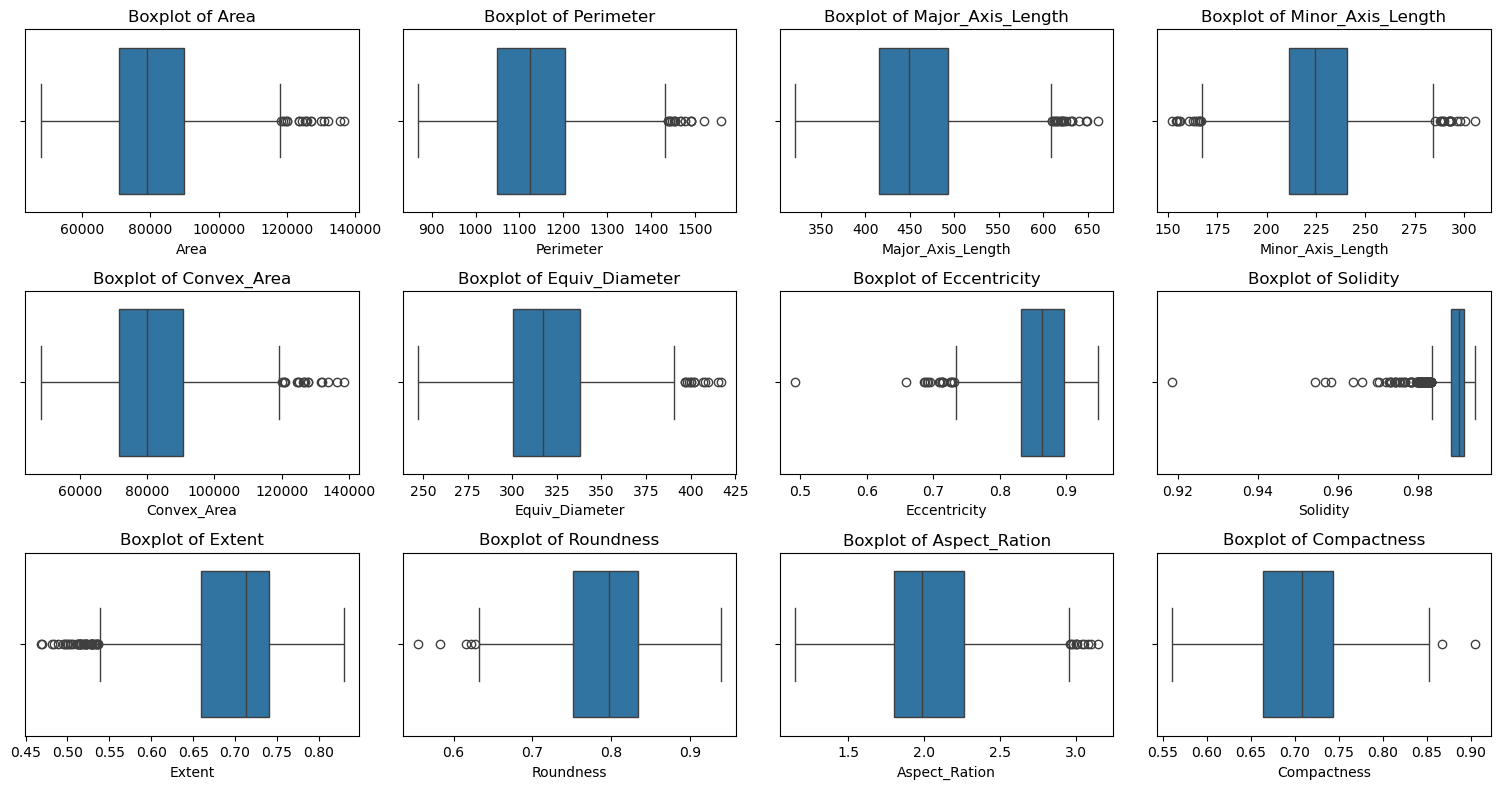

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for outlier analysis
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns[:-1]

# Create box plots for each numerical feature
plt.figure(figsize=(15, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()


Outliers are visually identified as individual points beyond the whiskers of each box plot. These points represent values that deviate significantly from the bulk of the data.

Given that the features with larger scales are *'Area,' 'Perimeter,' 'Major_Axis_Length,' 'Minor_Axis_Length,' 'Convex_Area,'* and *'Equiv_Diameter,'* the visual inspection of outliers in these features becomes crucial. Outliers in these features, due to their larger scales, may have a more pronounced impact on the overall distribution and analysis. 

Now that we have detected the presence of outliers in our dataset, we now perform the extraction of outliers in the dataset using the **Interquartile Range (IQR)** method.

In [35]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

outliers_for_feature = ((df < lower_threshold) | (df > upper_threshold))

outliers = outliers_for_feature.any(axis=1)

outlier_df = df[outliers]

outlier_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
43,55811,937.114,360.5674,199.1350,56778,266.5723,0.8337,0.9830,0.6303,0.7986,1.8107,0.7393,0
48,67135,1031.821,368.1006,238.7819,68784,292.3678,0.7611,0.9760,0.6867,0.7924,1.5416,0.7943,0
80,70285,1038.973,397.2996,227.0837,71505,299.1482,0.8206,0.9829,0.6928,0.8182,1.7496,0.7530,0
95,82306,1059.110,390.5541,268.9078,82826,323.7210,0.7252,0.9937,0.7279,0.9221,1.4524,0.8289,0
101,91282,1171.051,427.7433,273.1993,93122,340.9162,0.7695,0.9802,0.7115,0.8365,1.5657,0.7970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,78792,1139.471,449.2928,226.5793,80186,316.7350,0.8635,0.9826,0.6102,0.7626,1.9829,0.7050,1
2480,72140,1178.246,516.2589,184.5502,75406,303.0701,0.9339,0.9567,0.5163,0.6530,2.7974,0.5871,1
2481,52367,1001.304,438.2606,154.5346,53045,258.2165,0.9358,0.9872,0.6240,0.6564,2.8360,0.5892,1
2490,51555,934.911,401.8321,164.7038,52013,256.2067,0.9121,0.9912,0.7187,0.7412,2.4397,0.6376,1


This method is based on the IQR, where outliers are identified as values falling below lower_threshold or above upper_threshold for each feature. The any(axis=1) operation ensures that a row is marked as an outlier if any of its features contain an outlier. 

**Note:** *The choice of 1.5 as the multiplier for the IQR is a common practice.*

As mentioned earlier, features with larger scales play a significant role in describing the physical characteristics of pumpkin seeds, hence identifying outliers in these features becomes crucial.

Outliers in features such as *'Area'* and *'Perimeter'* may represent extreme values in size and dimensions, potentially indicating unique or anomalous characteristics among pumpkin seeds. Due to the inherent importance of these features in characterizing pumpkin seeds, outliers in these larger scale features can influence statistical measures and machine learning models.

By employing the Interquartile Range (IQR) method specifically on these selected features, the code ensures a focused approach to detecting outliers based on the unique characteristics of each feature's distribution. 

In [36]:
# Select only the specified features
selected_features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter']

# Calculate Quartiles and IQR for selected features
Q1 = df[selected_features].quantile(0.25)
Q3 = df[selected_features].quantile(0.75)
IQR = Q3 - Q1

# Define Thresholds for Outliers
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

# Identify Outliers for Selected Features
outliers_for_features = ((df[selected_features] < lower_threshold) | (df[selected_features] > upper_threshold))

# Combine Outliers Across Selected Features
outliers = outliers_for_features.any(axis=1)

# Extract Rows with Outliers in Selected Features
outlier_df = df[outliers]

# Display the DataFrame of Outliers
outlier_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
106,96211,1169.304,418.7244,293.4921,97138,349.9995,0.7132,0.9905,0.7516,0.8843,1.4267,0.8359,0
167,107244,1239.755,474.7988,288.5734,108061,369.5231,0.7941,0.9924,0.7399,0.8768,1.6453,0.7783,0
226,102803,1416.303,614.8959,216.4382,104364,361.7912,0.9360,0.9850,0.7472,0.6440,2.8410,0.5884,0
263,105937,1246.342,463.7643,292.4844,107158,367.2645,0.7760,0.9886,0.7699,0.8570,1.5856,0.7919,0
303,93178,1124.779,405.6369,293.4700,93976,344.4385,0.6903,0.9915,0.7755,0.9255,1.3822,0.8491,0
377,105853,1234.626,469.2956,288.6814,106944,367.1188,0.7884,0.9898,0.7311,0.8727,1.6257,0.7823,0
636,103042,1223.292,455.1749,289.9712,104062,362.2115,0.7708,0.9902,0.7566,0.8653,1.5697,0.7958,0
901,105706,1234.898,461.5564,292.5300,106736,366.8638,0.7735,0.9904,0.7302,0.8711,1.5778,0.7948,0
916,99780,1178.461,435.2836,292.6174,100487,356.4321,0.7403,0.9930,0.7403,0.9029,1.4876,0.8189,0
997,98431,1173.012,434.4499,289.1724,99167,354.0145,0.7463,0.9926,0.7508,0.8990,1.5024,0.8149,0


In [37]:
# Remove outliers
df = df[~outliers]

### DISREGARD THIS STEP MUNA

Now, we apply mathematical transformations to the data to reduce the impact of outliers. This can help mitigate the influence of outliers without discarding data.

We specifically chose to apply a **Square Root Transformation** to reduce the impact of outliers and stabilize variance.

This code snippet below essentially targets specific cells in the dataset, applying the square root transformation only to those cells that meet the criteria of being outliers in the specified features.

In [38]:
#import numpy as np

# Select only the specified features
#selected_features = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter']

# Calculate Quartiles and IQR for selected features
#Q1 = df[selected_features].quantile(0.25)
#Q3 = df[selected_features].quantile(0.75)
#IQR = Q3 - Q1

# Define Thresholds for Outliers
#lower_threshold = Q1 - 1.5 * IQR
#upper_threshold = Q3 + 1.5 * IQR

# Identify Outliers for Selected Features
#outliers_for_features = ((df[selected_features] < lower_threshold) | (df[selected_features] > upper_threshold))

# Apply Square Root Transformation only to Outliers
#df[selected_features] = np.where(outliers_for_features, np.sqrt(df[selected_features]), df[selected_features])

# Display the DataFrame after the transformation
#df

### Feature Scaling Numerical Features

Based on this analysis, features like *'Area,' 'Perimeter,' 'Major_Axis_Length,' 'Minor_Axis_Length,' 'Convex_Area,'* and *'Equiv_Diameter'* have relatively large values compared to features like *'Eccentricity,' 'Solidity,' 'Extent,' 'Roundness,'* and *'Compactness,'* which are already within the [0, 1] range.

Normalization is often beneficial for features with larger scales to ensure that they don't dominate the learning process in certain machine learning algorithms. Therefore, we consider normalizing the features *'Area,' 'Perimeter,' 'Major_Axis_Length,' 'Minor_Axis_Length,' 'Convex_Area,'* and *'Equiv_Diameter.'*

Specifically, **Min-Max Scaling**, as implemented by the *MinMaxScaler*, scales the values of each feature to a specific range, commonly between 0 and 1. 

In [43]:
# Instantiate the MinMaxScaler
scaler = MinMaxScaler()

features_to_normalize = ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter']

# Select the rows and columns to normalize
rows_to_normalize = df.index
columns_to_normalize = features_to_normalize

# Use .loc to perform the normalization and explicitly cast to float64
df.loc[rows_to_normalize, columns_to_normalize] = scaler.fit_transform(df.loc[rows_to_normalize, columns_to_normalize]).astype('float64')

df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.119284,0.035967,0.018427,0.451652,0.120541,0.147012,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,0.410519,0.363480,0.334738,0.570950,0.411734,0.465536,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,0.338866,0.390498,0.399496,0.373259,0.345988,0.391544,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,0.264966,0.224950,0.210953,0.471208,0.267027,0.312469,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,0.259944,0.236046,0.219029,0.453491,0.267013,0.306985,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.453528,0.648502,0.737604,0.197519,0.455892,0.508790,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,0.310593,0.392921,0.493679,0.209324,0.311143,0.361640,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,0.573098,0.622295,0.647512,0.468266,0.574382,0.624926,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,0.458879,0.572474,0.629052,0.319600,0.463311,0.514115,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


# Section 5. Exploratory Data Analysis 

To generate descriptive statistics of the dataset, we use the *describe()* method in pandas. It provides a summary of the central tendency, dispersion, and shape of the distribution of each numerical feature in the dataset. 

In [44]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000,2442.000000
mean,0.461887,0.470413,0.465902,0.496456,0.465679,0.509908,0.860546,0.989479,0.693365,0.792450,2.035883,0.704853,0.473382
std,0.183206,0.189126,0.187448,0.188967,0.183684,0.180940,0.044120,0.003506,0.060575,0.054686,0.308020,0.051871,0.499393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.000000
25%,0.326418,0.328002,0.325315,0.375007,0.329541,0.378429,0.831700,0.988300,0.659300,0.753725,1.801100,0.665125,0.000000
50%,0.442239,0.461429,0.444924,0.487804,0.446088,0.497517,0.863250,0.990300,0.713100,0.798400,1.981150,0.708600,0.000000
75%,0.587088,0.602058,0.593356,0.618403,0.592460,0.638147,0.895800,0.991500,0.739975,0.834375,2.250225,0.743500,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.000000


### Class Distirbution

In order to have a clear representation of the distribution of different classes and to understand the balance or imbalance among the classes in the dataset, we create a count plot that shows the number of occurrences of each unique class in the dataset.

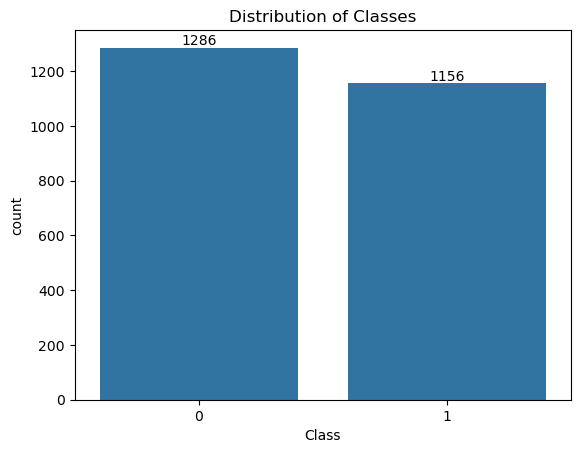

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a count plot
ax = sns.countplot(x='Class', data=df)

# Display the count above each bar without overlapping
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Classes')
plt.show()


As can be observed in the plot above, the class distribution in the dataset shows a relatively minor imbalance between Class 0 - *Çerçevelik* (1286 occurrences) and Class 1 - *Ürgüp Sivrisi* (1156 occurrences). While there is a difference in the number of instances between the two classes, it is not a severe imbalance. 

In many cases, imbalances of this magnitude may not pose significant challenges, and standard machine learning algorithms can often handle such imbalances without major issues.

### Feature Distributions

Histograms of each feature help provide insights into the distribution of values within each feature.

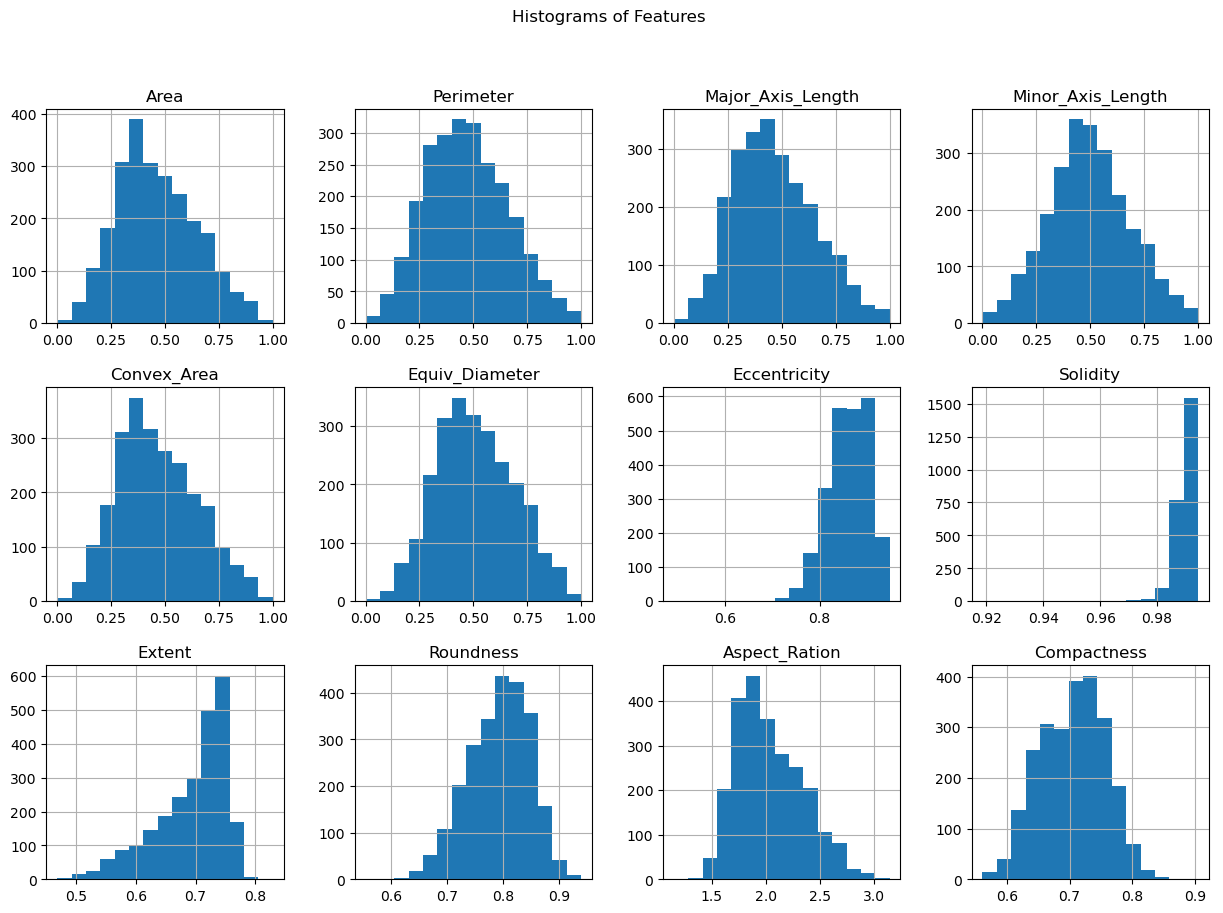

In [46]:
df.drop('Class', axis=1).hist(bins=15, figsize=(15, 10), layout=(3, 4))
plt.suptitle('Histograms of Features')
plt.show()

We can further validate the type of distribution by applying a skewness test on each feature of the dataset.  Skewness measures the asymmetry of the distribution. A skewness value of 0 indicates a perfectly symmetrical distribution. Positive skewness indicates a right-skewed (long tail on the right) distribution, while negative skewness indicates a left-skewed (long tail on the left) distribution.

In [47]:
# Exclude non-numeric columns (assuming 'Class' is non-numeric)
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:-1]

# Calculate skewness for each numeric column
skewness_results = {}
for column in numeric_columns:
    skewness = skew(df[column])
    skewness_results[column] = skewness

# Create a DataFrame from the skewness results
skewness_df = pd.DataFrame(list(skewness_results.items()), columns=['Feature', 'Skewness'])

# Print or inspect the skewness DataFrame
print(skewness_df)


              Feature  Skewness
0                Area  0.348270
1           Perimeter  0.256395
2   Major_Axis_Length  0.360594
3   Minor_Axis_Length  0.094652
4         Convex_Area  0.346374
5      Equiv_Diameter  0.174499
6        Eccentricity -0.712856
7            Solidity -5.735091
8              Extent -1.033922
9           Roundness -0.380016
10      Aspect_Ration  0.550799
11        Compactness -0.081738


Upon visual inspection of the histograms, the distribution of features appears to be **mostly right-skewed**, as evidenced by the longer right tails. This observation aligns with the positive skewness values obtained from the skewness test for features like *'Area,' 'Perimeter,' 'Major_Axis_Length,''Convex_Area,''Aspect_Ration,'* and *'Equiv_Diameter.'* 

However, some features, namely *'Solidity,' 'Extent,' 'Roundness'* and *'Eccentricity,'* display a **left-skewed** distribution, characterized by longer left tails. Features with skewness values close to zero, such as *'Minor_Axis_Length'* and *'Compactness'* suggest a **relatively symmetric distribution**. 

### Correlation Checking

Correlation checking is crucial for understanding relationships between different variables in a dataset. It helps identify patterns, dependencies, or potential multicollinearity that can impact the performance of machine learning models.

The code snippet below calculates the correlation coefficients between the *"Class"* variable and all other variables in the dataset. Sorting these values provides insights into which features exhibit stronger positive or negative correlations with the target variable.

In [48]:
df.corr()['Class'].sort_values()

Compactness         -0.726152
Roundness           -0.667275
Minor_Axis_Length   -0.414748
Extent              -0.230862
Solidity             0.123889
Equiv_Diameter       0.160867
Convex_Area          0.166254
Area                 0.168689
Perimeter            0.393100
Major_Axis_Length    0.566705
Eccentricity         0.698788
Aspect_Ration        0.722418
Class                1.000000
Name: Class, dtype: float64

The correlation results between features and the target variable ("Class") provide insights into their relationships. Here are some key observations:

- **Negative Correlations:**

    - Features like *"Compactness"* and *"Roundness"* exhibit strong negative correlations with the "Class" variable. As these values decrease, the likelihood of belonging to a specific class increases.

- **Positive Correlations:**

    - Conversely, features such as *"Aspect_Ratio," "Eccentricity," "Major_Axis_Length,"* and *'Perimeter'* show strong positive correlations with the target variable. Higher values of these features are associated with a higher probability of belonging to a particular class.
    
We can also display the correlations of each combination of two features through a correlation matrix.   

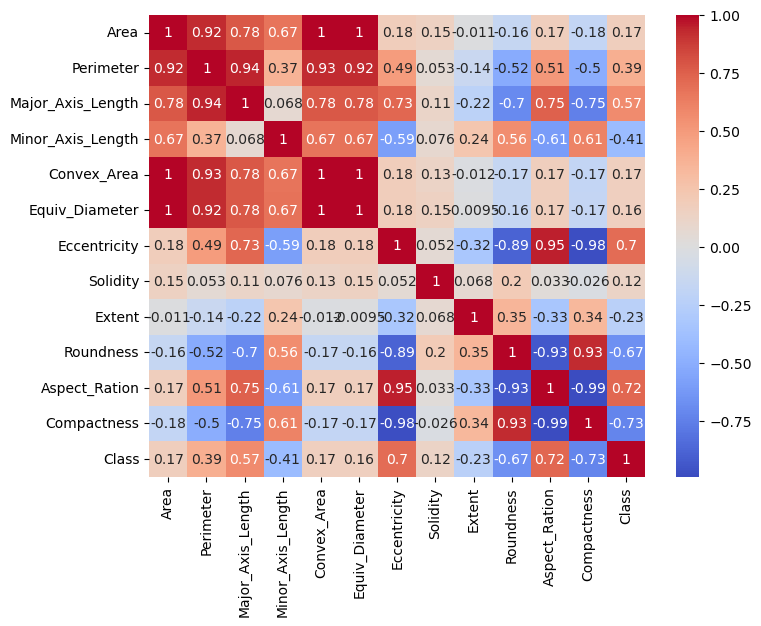

In [52]:
# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, cmap="coolwarm", annot=True, annot_kws={"size": 10})

# Show the plot
plt.show()

### Boxplots of Each Feature

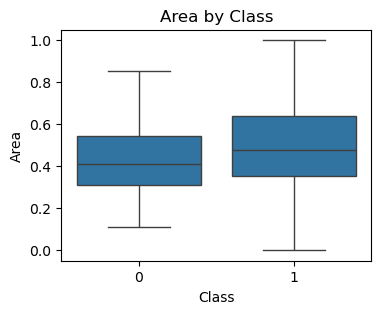

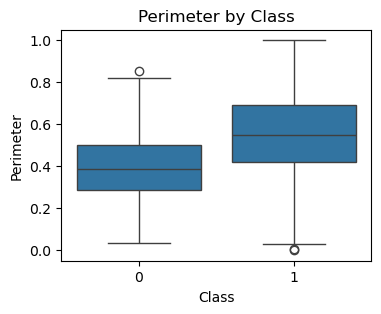

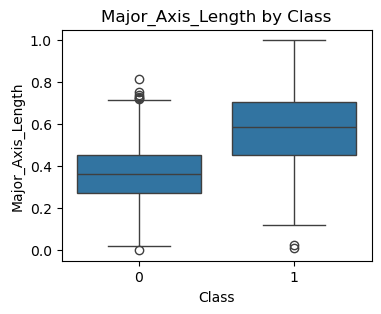

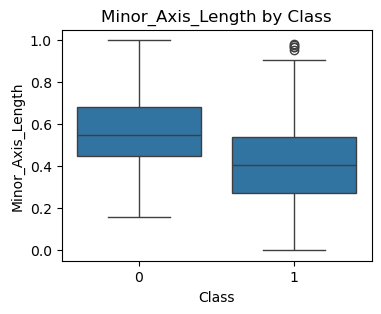

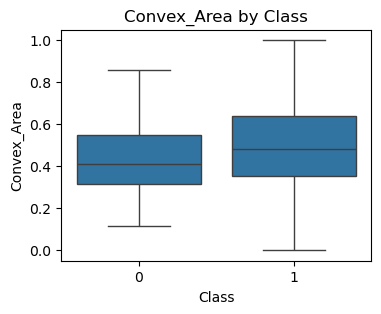

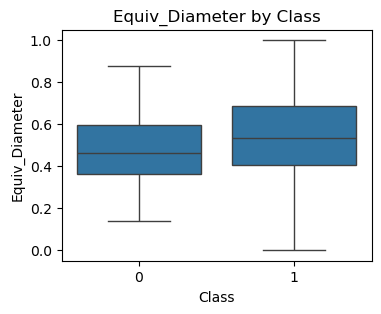

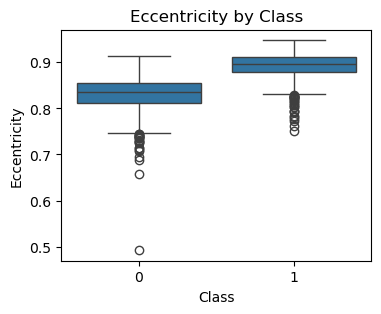

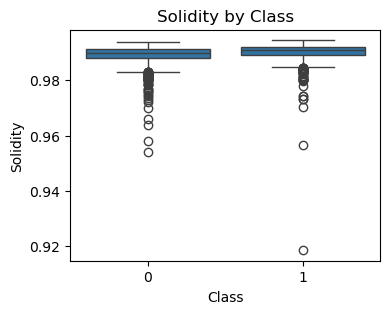

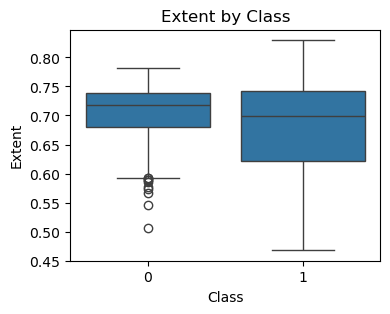

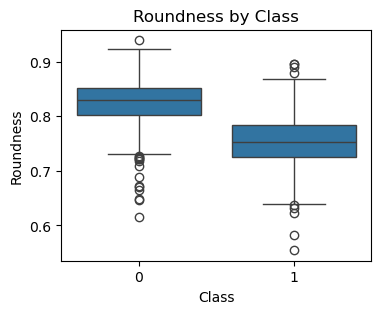

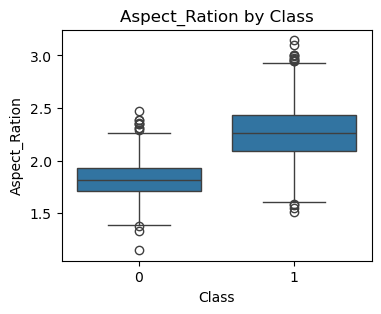

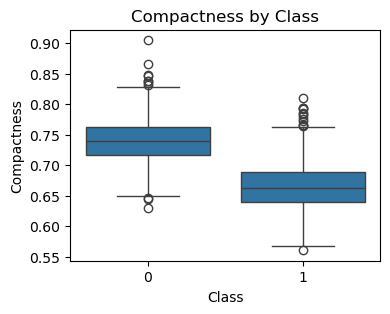

In [23]:
# Boxplots of features by class // Feature-Class Relationship 
features = df.columns.drop('Class')
for feature in features:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} by Class')
    plt.show()


In [ ]:
# Pairplot // Pairwise relationship 
sns.pairplot(df, hue='Class')
plt.show()

# Section 6. Model Training
note: rough "draft" palang to ng model training haha 

In [ ]:
# Selecting features and target
features = df[['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Eccentricity', 'Roundness']]
target = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_predictions = knn.predict(X_test_scaled)

In [ ]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_predictions = nb.predict(X_test_scaled)

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_predictions = lr.predict(X_test_scaled)

In [ ]:
# Evaluating the models
print("kNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))

# Detailed report
print("\nkNN Classification Report:\n", classification_report(y_test, knn_predictions))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))

# Section 7. Hyperparameter Tuning


Hyperparameter tuning is the process of selecting the optimal hyperparameter values for a machine learning algorithm to achieve better performance. One common method for hyperparameter tuning is grid search, which systematically explores a predefined set of hyperparameter values to find the combination that yields the best model performance.

### k-Nearest Neighbors: Finding the best hyperparameter 'k'

In the context of k-nearest neighbors (kNN), the *key hyperparameter is 'k'* —the number of neighbors considered when making predictions. The process of finding the best 'k' value involves trying different 'k' values, training the model for each, and evaluating its performance using cross-validation. This helps to identify the 'k' that results in the highest accuracy or another chosen performance metric.

The code below automates the process of finding the optimal 'k' for the kNN classifier by systematically exploring a range of 'k' values and visualizing the cross-validation scores with error bars for each 'k.' 

In [ ]:
import matplotlib.pyplot as plt

# Define a range of k values to test
k_values = list(range(3, 31))

# Create kNN classifier
knn = KNeighborsClassifier()

# Define parameter grid for kNN
param_grid = {'n_neighbors': k_values}

In [ ]:
# Instantiate GridSearchCV with 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_scaled, y_train)

In [ ]:
# Visualize the cross-validation scores with error bars
cv_results = grid_search.cv_results_
colors = plt.cm.viridis_r(np.linspace(0, 1, len(k_values)))
plt.figure(figsize=(10, 6))
for i, (color, k) in enumerate(zip(colors, k_values)):
    plt.errorbar(k, cv_results['mean_test_score'][i], yerr=cv_results['std_test_score'][i], marker='o', linestyle='-', color=color, label=f'k={k}')

plt.title('Cross-Validation Scores with Error Bars for Different Values of k')
plt.xlabel('k')
plt.ylabel('Mean Test Score')
plt.legend()
plt.grid(True)
plt.show()

After visualizing the cross-validation scores for different values of 'k,' it was observed that the 'k' value with the highest mean test score was **21**. Therefore, the best hyperparameter value for the k-nearest neighbors (kNN) model was determined to be 21.

In [ ]:
# Get the best hyperparameter values
best_k = grid_search.best_params_['n_neighbors']
print("Best k:", best_k)

The kNN model, configured with the optimal 'k' value of 21, is trained and evaluated on the test set. 

In [ ]:
# Use the best hyperparameter to train the final kNN model
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)
knn_predictions = final_knn.predict(X_test_scaled)

# Print the accuracy of the model using the best k on the test set
test_accuracy = accuracy_score(y_test, knn_predictions)
print(f"kNN Test Accuracy with Best k ({best_k}): {test_accuracy:.4f}")

# Section 8. Model Selection

*Present a summary of all model configurations. Include each algorithm and the best set of
values for its hyperparameters. Identify the best model configuration and discuss its advantage
over other configurations.*

# Section 9. Insights and Conclusion
*Clearly state your insights and conclusions from training a model on the data. Why did some models produce better results? Summarize your conclusions to explain the performance of themodels. Discuss recommendations to improve the performance of the model.*

# Section 10. References